In [59]:
from requests import Session
import json
import pprint


url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' # Coinmarketcap API url

api = 'baf96e8b-6bf3-4045-82b3-584cb32cf067' # Replace this with your API key

parameters = {'start':'1','limit':'30','convert':'EUR'} # API parameters to pass in for retrieving specific cryptocurrency data

headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': api
} # Headers for the API request

session = Session() # Create new session object to manage API requests
session.headers.update(headers) #Update the session headers with the specified headers

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  pprint.pprint(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)



{'data': [{'circulating_supply': 19409668,
           'cmc_rank': 1,
           'date_added': '2010-07-13T00:00:00.000Z',
           'id': 1,
           'infinite_supply': False,
           'last_updated': '2023-06-23T07:15:00.000Z',
           'max_supply': 21000000,
           'name': 'Bitcoin',
           'num_market_pairs': 10249,
           'platform': None,
           'quote': {'EUR': {'fully_diluted_market_cap': 577636232367.8685,
                             'last_updated': '2023-06-23T07:16:30.000Z',
                             'market_cap': 533891785477.67163,
                             'market_cap_dominance': 49.7865,
                             'percent_change_1h': -0.26102077,
                             'percent_change_24h': -0.53246775,
                             'percent_change_30d': 12.07249754,
                             'percent_change_60d': 9.29490844,
                             'percent_change_7d': 17.15993192,
                             'percent_chang

In [50]:
type(data)

dict

In [51]:
import pandas as pd
pd.set_option('display.max_columns',None)

In [60]:
#nomalization of the json

df = pd.json_normalize(data['data'])

#Create a Timestam
df['timestamp'] = pd.to_datetime('now')
df

/var/folders/6t/yx9sc10955x87d5c63kvm7g00000gn/T/ipykernel_29155/3638112972.py:6: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.EUR.price,quote.EUR.volume_24h,quote.EUR.volume_change_24h,quote.EUR.percent_change_1h,quote.EUR.percent_change_24h,quote.EUR.percent_change_7d,quote.EUR.percent_change_30d,quote.EUR.percent_change_60d,quote.EUR.percent_change_90d,quote.EUR.market_cap,quote.EUR.market_cap_dominance,quote.EUR.fully_diluted_market_cap,quote.EUR.tvl,quote.EUR.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10249,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.940967e+07,1.940967e+07,False,NaN,1,NaN,NaN,NaN,2023-06-23T07:15:00.000Z,27506.487256,1.678196e+10,-40.6363,-0.261021,-0.532468,17.159932,12.072498,9.294908,8.860965,5.338918e+11,49.7865,5.776362e+11,NaN,2023-06-23T07:16:30.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-23 07:17:31.546727
1,1027,Ethereum,ETH,ethereum,7028,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201965e+08,1.201965e+08,True,NaN,2,NaN,NaN,NaN,2023-06-23T07:15:00.000Z,1722.529496,6.315932e+09,-41.3902,-0.450564,-1.626245,12.369458,3.008168,1.985551,7.159196,2.070420e+11,19.3071,2.070420e+11,NaN,2023-06-23T07:16:30.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-23 07:17:31.546727
2,825,Tether,USDT,tether,55805,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.317704e+10,8.858353e+10,True,NaN,3,NaN,NaN,NaN,2023-06-23T07:15:00.000Z,0.917595,2.443249e+10,-33.6571,0.008696,0.025420,0.087102,0.017405,0.035091,-0.097397,7.632287e+10,7.1173,8.128384e+10,NaN,2023-06-23T07:16:30.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-06-23 07:17:31.546727
3,1839,BNB,BNB,bnb,1467,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.558526e+08,1.558526e+08,False,NaN,4,NaN,NaN,NaN,2023-06-23T07:15:00.000Z,222.533071,5.091363e+08,-26.3349,-0.481322,-3.614079,1.322031,-21.366101,-26.275865,-25.168457,3.468235e+10,3.2345,3.468235e+10,NaN,2023-06-23T07:16:30.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-23 07:17:31.546727
4,3408,USD Coin,USDC,usd-coin,13073,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.848562e+10,2.848562e+10,False,NaN,5,NaN,NaN,NaN,2023-06-23T07:15:00.000Z,0.917375,3.859940e+09,-33.1037,0.004985,-0.002820,-0.025000,0.006898,0.018488,-0.002557,2.613201e+10,2.4369,2.613201e+10,NaN,2023-06-23T07:16:30.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-06-23 07:17:31.546727
5,52,XRP,XRP,xrp,969,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.209863e+10,9.998884e+10,False,NaN,6,NaN,NaN,NaN,2023-06-23T07:15:00.000Z,0.453201,1.053012e+09,-23.6024,-0.677416,-3.168367,2.896365,7.591806,6.064580,10.356597,2.361117e+10,2.2020,4.532014e+10,NaN,2023-06-23T07:16:30.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-23 07:17:31.546727
6,2010,Cardano,ADA,cardano,842,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.493036e+10,3.590566e+10,False,NaN,7,NaN,NaN,NaN,2023-06-23T07:15:00.000Z,0.267512,2.509059e+08,-21.1752,-0.569691,-1.404086,10.699404,-20.203898,-24.412866,-19.338318,9.344287e+09,0.8715,1.203804e+10,NaN,2023-06-23T07:16:30.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-23 07:17:31.546727
7,74,Dogecoin,DOGE,dogecoin,730,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.398820e+11,1.398820e+11,True,NaN,8,NaN,NaN,NaN,2023-06-23T07:15:00.000Z,0.060890,2.744627e+08,-29.9556,-0.356055,-2.214652,7.437438,-6.893373,-15.867173,-11.467240,8.517408e+09,0.7943,8.517408e+09,NaN,2023-06-23T07:16:30.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-23 07:17:31.546727
8,5426,Solana,SOL,solana,475,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,3.996592e+08

In [8]:
#Create the function

def api_runner():
    global df

    from requests import Session
    import json
    import pprint


    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' # Coinmarketcap API url

    api = 'baf96e8b-6bf3-4045-82b3-584cb32cf067' # Replace this with your API key

    parameters = {'start':'1','limit':'30','convert':'EUR'} # API parameters to pass in for retrieving specific cryptocurrency data

    headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': api
    } # Headers for the API request

    session = Session() # Create new session object to manage API requests
    session.headers.update(headers) #Update the session headers with the specified headers

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #pprint.pprint(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    #nomalization of the json

    df = pd.json_normalize(data['data'])

    #Create a Timestam
    df['timestamp'] = pd.to_datetime('now')
    
    df
    
    if not os.path.isfile('/Users/yacinelandolsi/Introduction Python Youtube/Pandas Tutorials/How to Use and API/API Archives/API.csv'):
        df.to_csv('/Users/yacinelandolsi/Introduction Python Youtube/Pandas Tutorials/How to Use and API/API Archives/API.csv', header = 'column_names')
    else:
        df.to_csv('/Users/yacinelandolsi/Introduction Python Youtube/Pandas Tutorials/How to Use and API/API Archives/API.csv', mode = 'a', header = False)



In [9]:
#automatize

import os 
from time import time
from time import sleep

for i in range(50):
    api_runner()
    print('API runner complited')
    sleep(4) #sleep for #1min
exit()

    


/var/folders/6t/yx9sc10955x87d5c63kvm7g00000gn/T/ipykernel_34220/287204381.py:37: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API runner complited


/var/folders/6t/yx9sc10955x87d5c63kvm7g00000gn/T/ipykernel_34220/287204381.py:37: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API runner complited


/var/folders/6t/yx9sc10955x87d5c63kvm7g00000gn/T/ipykernel_34220/287204381.py:37: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API runner complited


KeyboardInterrupt: 

In [10]:
#read the csv 

df = pd.read_csv('/Users/yacinelandolsi/Introduction Python Youtube/Pandas Tutorials/How to Use and API/API Archives/API.csv')
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,...,quote.EUR.market_cap_dominance,quote.EUR.fully_diluted_market_cap,quote.EUR.tvl,quote.EUR.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10249,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.940967e+07,...,49.7919,5.797519e+11,NaN,2023-06-23T07:41:30.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-23 07:42:18.400414
1,1,1027,Ethereum,ETH,ethereum,7028,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.201965e+08,...,19.3263,2.079847e+11,NaN,2023-06-23T07:41:30.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-23 07:42:18.400414
2,2,825,Tether,USDT,tether,55805,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,8.317704e+10,...,7.1172,8.157169e+10,NaN,2023-06-23T07:41:30.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-06-23 07:42:18.400414
3,3,1839,BNB,BNB,bnb,1467,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.558526e+08,...,3.2372,3.483684e+10,NaN,2023-06-23T07:41:30.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-23 07:42:18.400414
4,4,3408,USD Coin,USDC,usd-coin,13073,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,2.848562e+10,...,2.4368,2.622458e+10,NaN,2023-06-23T07:41:30.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-06-23 07:42:18.400414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,25,1831,Bitcoin Cash,BCH,bitcoin-cash,703,2017-07-23T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'marketplace', ...",2.100000e+07,1.942771e+07,...,0.2351,2.741586e+09,NaN,2023-06-23T09:22:30.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-23 09:23:33.568648
176,26,3897,OKB,OKB,okb,98,2019-04-30T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'disco...",NaN,6.000000e+07,...,0.2271,1.225245e+10,NaN,2023-06-23T09:22:30.000Z,1027.0,Ethereum,ETH,ethereum,0x75231f58b43240c9718dd58b4967c5114342a86c,2023-06-23 09:23:33.568648
177,27,1321,Ethereum Classic,ETC,ethereum-classic,411,2016-07-24T00:00:00.000Z,"['mineable', 'pow', 'ethash', 'platform', 'sma...",2.107000e+08,1.415908e+08,...,0.2061,3.309433e+09,NaN,2023-06-23T09:22:30.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-23 09:23:33.568648
178,28,512,Stellar,XLM,stellar,492,2014-08-05T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",5.000181e+10,2.689581e+10,...,0.2013,4.038088e+09,NaN,2023-06-23T09:22:30.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-23 09:23:33.568648


In [11]:
#change float format

pd.set_option("display.float_format", lambda x: '%.5f' % x)

In [12]:
#change max rows displayed to 500

pd.set_option('display.max_rows', 500)

In [13]:
df3 = df.groupby('name', sort=False)[['quote.EUR.percent_change_1h','quote.EUR.percent_change_24h','quote.EUR.percent_change_7d','quote.EUR.percent_change_30d','quote.EUR.percent_change_60d','quote.EUR.percent_change_90d']].mean()

In [14]:
df4 = df3.stack()
df4

name                                           
Bitcoin            quote.EUR.percent_change_1h     -0.04147
                   quote.EUR.percent_change_24h    -0.30553
                   quote.EUR.percent_change_7d     17.34931
                   quote.EUR.percent_change_30d    12.14947
                   quote.EUR.percent_change_60d     9.55727
                   quote.EUR.percent_change_90d     9.09716
Ethereum           quote.EUR.percent_change_1h     -0.08530
                   quote.EUR.percent_change_24h    -1.44045
                   quote.EUR.percent_change_7d     12.60701
                   quote.EUR.percent_change_30d     3.41618
                   quote.EUR.percent_change_60d     2.08787
                   quote.EUR.percent_change_90d     7.55842
Tether             quote.EUR.percent_change_1h      0.00017
                   quote.EUR.percent_change_24h     0.01766
                   quote.EUR.percent_change_7d      0.10783
                   quote.EUR.percent_change_30d     

In [108]:
type(df4)

pandas.core.series.Series

In [15]:
df5 = df4.to_frame(name='Values')
df5

Values
name                                                    
Bitcoin           quote.EUR.percent_change_1h   -0.04147
                  quote.EUR.percent_change_24h  -0.30553
                  quote.EUR.percent_change_7d   17.34931
                  quote.EUR.percent_change_30d  12.14947
                  quote.EUR.percent_change_60d   9.55727
                  quote.EUR.percent_change_90d   9.09716
Ethereum          quote.EUR.percent_change_1h   -0.08530
                  quote.EUR.percent_change_24h  -1.44045
                  quote.EUR.percent_change_7d   12.60701
                  quote.EUR.percent_change_30d   3.41618
                  quote.EUR.percent_change_60d   2.08787
                  quote.EUR.percent_change_90d   7.55842
Tether            quote.EUR.percent_change_1h    0.00017
                  quote.EUR.percent_change_24h   0.01766
                  quote.EUR.percent_change_7d    0.10783
                  quote.EUR.percent_change_30d   0.01885
                  quote.EUR.percent_change_60d   0.01359
                  quote.EUR.percent_change_90d  -0.09249
BNB               quote.EUR.percent_change_1h   -0.20846
                  quote.EUR.percent_change_24h  -3.58461
                  quote.EUR.percent_change_7d    1.84420
                  quote.EUR.percent_change_30d -21.20713
                  quote.EUR.percent_change_60d -26.12275
                  quote.EUR.percent_change_90d -24.92065
USD Coin          quote.EUR.percent_change_1h   -0.00485
                  quote.EUR.percent_change_24h  -0.00570
                  quote.EUR.percent_change_7d   -0.02045
                  quote.EUR.percent_change_30d   0.00616
                  quote.EUR.percent_change_60d  -0.00529
                  quote.EUR.percent_change_90d   0.01401
XRP               quote.EUR.percent_change_1h   -0.48243
                  quote.EUR.percent_change_24h  -3.35696
                  quote.EUR.percent_change_7d    3.11534
                  quote.EUR.percent_change_30d   7.85765
                  quote.EUR.percent_change_60d   6.68536
                  quote.EUR.percent_change_90d  10.78184
Cardano           quote.EUR.percent_change_1h   -0.13140
                  quote.EUR.percent_change_24h  -2.37550
                  quote.EUR.percent_change_7d   11.96081
                  quote.EUR.percent_change_30d -20.06577
                  quote.EUR.percent_change_60d -23.74542
                  quote.EUR.percent_change_90d -18.68088
Dogecoin          quote.EUR.percent_change_1h   -0.27264
                  quote.EUR.percent_change_24h  -2.47601
                  quote.EUR.percent_change_7d    7.58406
                  quote.EUR.percent_change_30d  -6.83170
                  quote.EUR.percent_change_60d -15.68394
                  quote.EUR.percent_change_90d -11.18049
Solana            quote.EUR.percent_change_1h   -0.24433
                  quote.EUR.percent_change_24h  -3.04129
                  quote.EUR.percent_change_7d   12.94506
                  quote.EUR.percent_change_30d -14.01290
                  quote.EUR.percent_change_60d -21.53488
                  quote.EUR.percent_change_90d -18.73192
TRON              quote.EUR.percent_change_1h   -0.35433
                  quote.EUR.percent_change_24h  -1.84810
                  quote.EUR.percent_change_7d    3.15423
                  quote.EUR.percent_change_30d  -7.05893
                  quote.EUR.percent_change_60d   9.19735
                  quote.EUR.percent_change_90d  13.07835
Litecoin          quote.EUR.percent_change_1h    0.17031
                  quote.EUR.percent_change_24h   0.01148
                  quote.EUR.percent_change_7d   15.21949
                  quote.EUR.percent_change_30d   0.23272
                  quote.EUR.percent_change_60d  -0.23965
                  quote.EUR.percent_change_90d  -5.99896
Polygon           quote.EUR.percent_change_1h   -0.17797
                  quote.EUR.percent_change_24h  -3.86434
                  quote.EUR.percent_change_7d   13.30098
   

In [114]:
df5.count()

Values    180
dtype: int64

In [16]:
index = pd.Index(range(180))

#set up index manually
#df6 = df5.reset_index(index)

#reset the index
df6 = df5.reset_index()
df6

,name,level_1,Values
0,Bitcoin,quote.EUR.percent_change_1h,-0.04147
1,Bitcoin,quote.EUR.percent_change_24h,-0.30553
2,Bitcoin,quote.EUR.percent_change_7d,17.34931
3,Bitcoin,quote.EUR.percent_change_30d,12.14947
4,Bitcoin,quote.EUR.percent_change_60d,9.55727
5,Bitcoin,quote.EUR.percent_change_90d,9.09716
6,Ethereum,quote.EUR.percent_change_1h,-0.08530
7,Ethereum,quote.EUR.percent_change_24h,-1.44045
8,Ethereum,quote.EUR.percent_change_7d,12.60701
9,Ethereum,quote.EUR.percent_change_30d,3.41618


In [17]:
df7 = df6.rename(columns={'level_1':"percent_change"})
df7

,name,percent_change,Values
0,Bitcoin,quote.EUR.percent_change_1h,-0.04147
1,Bitcoin,quote.EUR.percent_change_24h,-0.30553
2,Bitcoin,quote.EUR.percent_change_7d,17.34931
3,Bitcoin,quote.EUR.percent_change_30d,12.14947
4,Bitcoin,quote.EUR.percent_change_60d,9.55727
5,Bitcoin,quote.EUR.percent_change_90d,9.09716
6,Ethereum,quote.EUR.percent_change_1h,-0.08530
7,Ethereum,quote.EUR.percent_change_24h,-1.44045
8,Ethereum,quote.EUR.percent_change_7d,12.60701
9,Ethereum,quote.EUR.percent_change_30d,3.41618


In [18]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import seaborn.objects as so



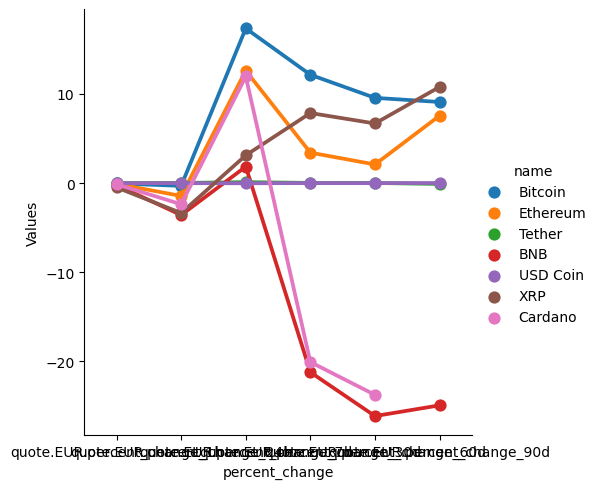

In [19]:
sns.catplot(x='percent_change',y='Values',hue='name',data=df7.head(41),kind='point')

In [20]:
#get unique values of colum percent change and convert to string

df7['percent_change'] = df7['percent_change'].astype(str)

valeurs_uniques = df7['percent_change'].unique().tolist()

print(valeurs_uniques)
        
        

#df7[''].replace(['quote.EUR.percent_change_1h','1h'])

['quote.EUR.percent_change_1h', 'quote.EUR.percent_change_24h', 'quote.EUR.percent_change_7d', 'quote.EUR.percent_change_30d', 'quote.EUR.percent_change_60d', 'quote.EUR.percent_change_90d']


In [21]:
#replace values of column percent_name by shorter ones

#print(valeurs_uniques)
#print (df7['percent_change'])

for i, value in enumerate(df7['percent_change']):
    for value2 in valeurs_uniques:
        if value == value2:
            df7.loc[i, 'percent_change'] = value.rsplit("_", 1)[-1]
            

In [27]:
#Query a dataframe to get bitcoin evolution

df8 = df[['name','quote.EUR.price','timestamp']]
df9 = df8.query("name =='Bitcoin'")
df9['timestamp'] = pd.to_datetime(df['timestamp'])
df9.dtypes


/var/folders/6t/yx9sc10955x87d5c63kvm7g00000gn/T/ipykernel_34220/350925309.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df9['timestamp'] = pd.to_datetime(df['timestamp'])


name                       object
quote.EUR.price           float64
timestamp          datetime64[ns]
dtype: object

<Axes: xlabel='timestamp', ylabel='quote.EUR.price'>

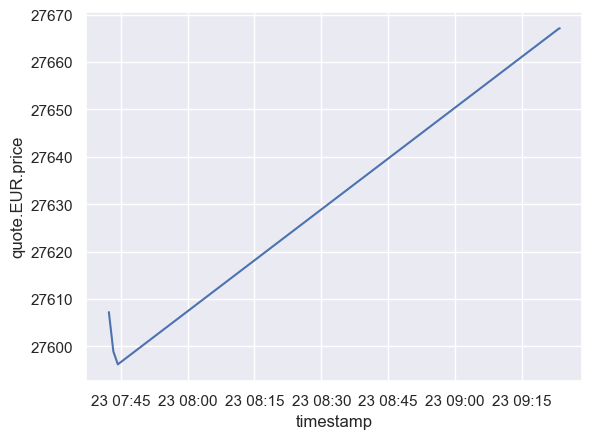

In [28]:
sns.set_theme(style='darkgrid')

sns.lineplot(x='timestamp',y='quote.EUR.price',data =df9)

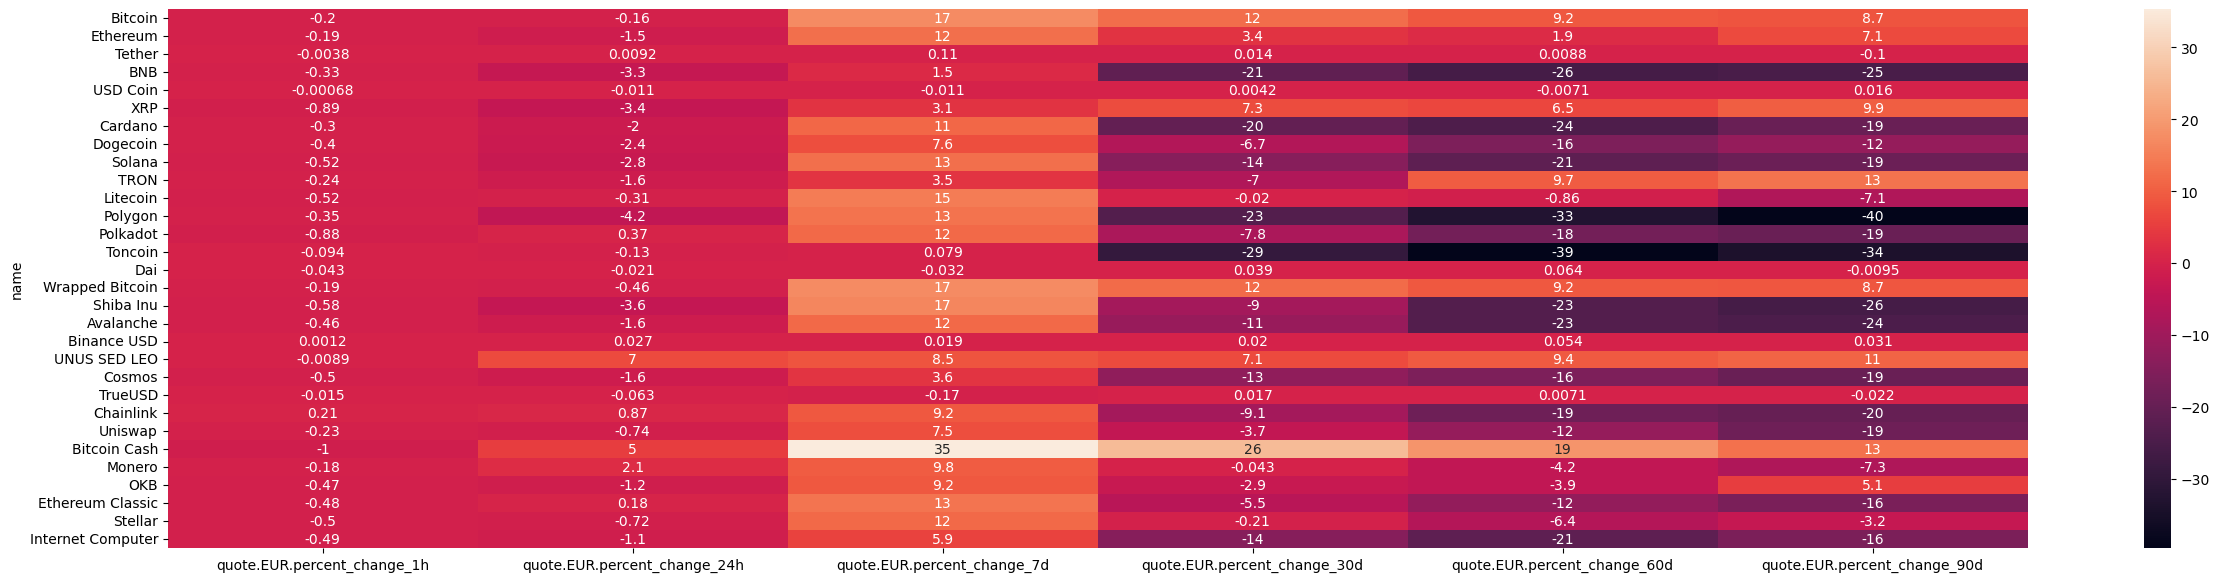

In [101]:
sns.heatmap(df3,annot=True)

plt.rcParams['figure.figsize'] = (30,7)

In [161]:
df8 = df[['name','quote.EUR.price','timestamp']]
df8

,name,quote.EUR.price,timestamp
0,Bitcoin,27607.23229,2023-06-23 07:42:18.400414
1,Ethereum,1730.37248,2023-06-23 07:42:18.400414
2,Tether,0.92084,2023-06-23 07:42:18.400414
3,BNB,223.52433,2023-06-23 07:42:18.400414
4,USD Coin,0.92063,2023-06-23 07:42:18.400414
5,XRP,0.45386,2023-06-23 07:42:18.400414
6,Cardano,0.26899,2023-06-23 07:42:18.400414
7,Dogecoin,0.06111,2023-06-23 07:42:18.400414
8,Solana,15.41841,2023-06-23 07:42:18.400414
9,TRON,0.06667,2023-06-23 07:42:18.400414


In [160]:
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.EUR.price,quote.EUR.volume_24h,quote.EUR.volume_change_24h,quote.EUR.percent_change_1h,quote.EUR.percent_change_24h,quote.EUR.percent_change_7d,quote.EUR.percent_change_30d,quote.EUR.percent_change_60d,quote.EUR.percent_change_90d,quote.EUR.market_cap,quote.EUR.market_cap_dominance,quote.EUR.fully_diluted_market_cap,quote.EUR.tvl,quote.EUR.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10249,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19409668.00000,19409668.00000,False,NaN,1,NaN,NaN,NaN,2023-06-23T07:40:00.000Z,27607.23229,16788987726.10270,-40.95940,-0.16976,-0.14166,17.46115,12.39736,9.19235,8.72068,535847213226.82812,49.79190,579751878175.52136,NaN,2023-06-23T07:41:30.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-23 07:42:18.400414
1,1,1027,Ethereum,ETH,ethereum,7028,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120196489.30790,120196489.30790,True,NaN,2,NaN,NaN,NaN,2023-06-23T07:40:00.000Z,1730.37248,6362286093.55345,-41.22770,-0.15239,-1.43545,12.52680,3.42052,1.86231,7.19190,207984696749.30338,19.32630,207984696749.30301,NaN,2023-06-23T07:41:30.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-23 07:42:18.400414
2,2,825,Tether,USDT,tether,55805,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,83177035118.23695,88583529362.30705,True,NaN,3,NaN,NaN,NaN,2023-06-23T07:40:00.000Z,0.92084,24442540818.05614,-34.04410,0.01927,0.02528,0.13702,0.04038,0.01902,-0.07660,76593148249.19357,7.11720,81571690878.85088,NaN,2023-06-23T07:41:30.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-06-23 07:42:18.400414
3,3,1839,BNB,BNB,bnb,1467,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,155852577.14384,155852577.14384,False,NaN,4,NaN,NaN,NaN,2023-06-23T07:40:00.000Z,223.52433,510580287.13929,-25.75900,-0.34770,-3.29493,1.50246,-21.22675,-26.18119,-25.13752,34836842395.88698,3.23720,34836842395.88513,NaN,2023-06-23T07:41:30.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-23 07:42:18.400414
4,4,3408,USD Coin,USDC,usd-coin,13073,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,28485621842.32699,28485621842.32699,False,NaN,5,NaN,NaN,NaN,2023-06-23T07:40:00.000Z,0.92063,3856772864.88743,-33.70000,0.01856,0.00377,0.00631,0.02141,0.00866,0.03494,26224583426.11070,2.43680,26224583426.10666,NaN,2023-06-23T07:41:30.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-06-23 07:42:18.400414
5,5,52,XRP,XRP,xrp,969,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,52098630775.00000,99988842772.00000,False,NaN,6,NaN,NaN,NaN,2023-06-23T07:40:00.000Z,0.45386,1065984941.92320,-22.57310,-0.89461,-3.42867,3.13132,7.31450,6.51959,9.88474,23645306744.04406,2.19720,45385658686.80798,NaN,2023-06-23T07:41:30.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-23 07:42:18.400414
6,6,2010,Cardano,ADA,cardano,842,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,34930356910.33300,35905661251.43000,False,NaN,7,NaN,NaN,NaN,2023-06-23T07:40:00.000Z,0.26899,249100161.34881,-22.60590,-0.30372,-1.96142,11.32145,-20.44497,-24.14192,-19.19728,9396070452.39311,0.87310,12104748068.93553,NaN,2023-06-23T07:41:30.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-23 07:42:18.400414
7,7,74,Dogecoin,DOGE,dogecoin,730,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,139881986383.70526,139881986383.70526,True,NaN,8,NaN,NaN,NaN,2023-06-23T07:40:00.000Z,0.06111,273536358.95855,-30.21700,-0.40410,-2.35716,7.61854,-6.75010,-15.83596,-11.55562,8548795413.04260,0.79440,8548795413.03931,NaN,2023-06-23